# 6-Amaliy mashg`ulot
## SVM algoritmi va uni realizatsiya qilish

## 1-qadam. Kerakli kutubxonalarni yuklash

In [2]:
#Kutubxonalarni yuklash
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


## 2-qadam. Tasodifiy ma'lumotlar orqali CSV fayliga saqlash - (QO'LDA KIRITILGAN)

## 3-qadam. CSV faylidan ma'lumotlarni yuklash

In [9]:
data = pd.read_csv('data2.csv')
# x = data[['qon_bosimi_speed','qon_bosimi_count','xolesterin','bmi','turmush_tarzi','tibbiyot_tarixi']] 
x = data[['qon_bosimi_speed','qon_bosimi_count']] 
y = data['dastlabki_holat']
data.head()

,qon_bosimi_speed,qon_bosimi_count,xolesterin,bmi,turmush_tarzi,tibbiyot_tarixi,dastlabki_holat
0,130,85,100,18,1,1,1
1,140,99,130,40,0,1,0
2,130,85,100,18,1,1,1
3,140,99,130,40,0,1,0
4,135,82,100,19,1,1,1


## 4-qadam. Ma'lumotlarni o'qitish va test to'plamlariga bo'lish

In [4]:
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

## 5-qadam. SVM tasniflagichini o'qitish

In [5]:
svm = SVC(kernel='linear', C=1.0, random_state=42, probability=True)
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True, random_state=42)

## 6-qadam. Gipertekislikning natijasini grafik shaklda ko'rsatish

In [6]:
def plot_decision_boundary(X, y, classifier):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                           np.arange(x2_min, x2_max, 0.1))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    
    # SVM gipertekisligini chizish
    w = classifier.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(x1_min, x1_max)
    yy = a * xx - (classifier.intercept_[0]) / w[1]
    plt.plot(xx, yy, '-b')
    
    plt.xlabel('Qon bosimi tezligi')
    plt.ylabel('Qon bosimi yurak urishlar soni')
    plt.title('SVM qaror chegarasi')
    plt.show()


6.1.Gipertekislikning natijasini grafik shaklda ko'rsatish


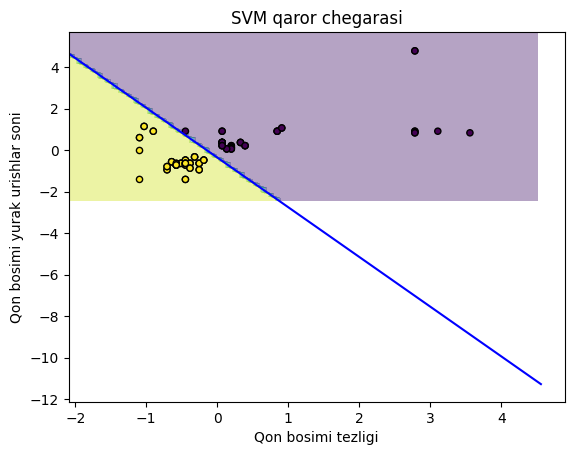

In [8]:
print("6.1.Gipertekislikning natijasini grafik shaklda ko'rsatish")
X_combined_std = np.vstack((X_train_scaled, X_test_scaled))
y_combined = np.hstack((y_train, y_test))
plot_decision_boundary(X_combined_std, y_combined, classifier=svm)

## 7-qadam. Kiritilgan odamni tasniflash

In [34]:
def classify_loan_applicants(applicants, classifier):
  # Kirish xususiyatlarini standartlashtirish
    applicants_scaled = scaler.fit_transform(applicants)
    
    # Har bir bemor uchun jimlik bo'yicha ehtimolini taxmin qilish
    decision_values = classifier.decision_function(applicants_scaled)
    # bemorni tasniflash
    classifications = []
    for decision_value in decision_values:
        if decision_value < -0.5:
            classifications.append('Sog\'lom')
        elif decision_value < 0.5:
            classifications.append('O\'rtacha daraja ')
        else:
            classifications.append('Kasal')
    print(decision_values)
    return classifications


## 8-qadam. Bemorning xolatini tasniflovchi parametrlar kiritilishi

In [24]:
def prompt_user_input():
    qon_bosimi_speat=float(input("Qon bosimi kiriting (systolic | High): "))
    qon_bosimi_count=float(input("Qon bosimi (diastolic | Low ): "))
    # xolesterin=float(input("Xolesterin mig'dirini kiriting: "))
    # bmi=float(input("BMI (Tana massasi indeksi) ni kiriting (15<BMI<45): "))
    # turmush_tarzi=float(input("Turmush tarzi kiriting (1-yaxshi, 0-yomon): "))
    # tibbiyot_tarixi=float(input("Tibbiyot tarixini kiriting (1-kasallangan, 0-sog'lom): "))
    # return np.array([[qon_bosimi_speat, qon_bosimi_count, xolesterin, bmi, turmush_tarzi, tibbiyot_tarixi]])
    return np.array([[qon_bosimi_speat, qon_bosimi_count]])

## 9-qadam. Kiritilgan bemorni holatini tasniflash

In [38]:
print("Model asosiy")
applicant_data = prompt_user_input()
classification = classify_loan_applicants(applicant_data, svm)
print("Kiritilgan ma'lumotlar asosida:")
print(f"Tasniflash: {classification[0]}")

Qon bosimi kiriting (systolic | High):  180
Qon bosimi (diastolic | Low ):  85


[-0.39852962]
Kiritilgan ma'lumotlar asosida:
Tasniflash: O'rtacha daraja 


## 10-qadam: CSV faylini  jadval sifatida chop etish

In [30]:
def print_csv_as_table(csv_file):
    data = pd.read_csv(csv_file)
    styles = [
        dict(selector="th", props=[("background-color", "#f2f2f2")]),
        dict(selector="td", props=[("background-color", "#ffffff")]),
    ]
    data.style.set_table_styles(styles)
    print(data)

print("CSV fayli jadval sifatida:")
print_csv_as_table("data2.csv")


CSV fayli jadval sifatida:
     qon_bosimi_speed  qon_bosimi_count  xolesterin  bmi  turmush_tarzi  \
0                 130                85         100   18              1   
1                 140                99         130   40              0   
2                 130                85         100   18              1   
3                 140                99         130   40              0   
4                 135                82         100   19              1   
..                ...               ...         ...  ...            ...   
99                182               156         210   30              0   
100               122               102         122   24              1   
101               123               109         120   23              1   
102               125               106         107   23              1   
103               182               106         180   19              0   

     tibbiyot_tarixi  dastlabki_holat  
0                  1            